In [1]:
from __future__ import print_function

In [3]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
df = pd.read_csv('employee_data.csv')

In [5]:
df.shape

(14249, 10)

In [6]:
#remove duplicates
df = df.drop_duplicates()

In [7]:
df.shape

(14221, 10)

In [8]:
#remove unwanted observations
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [9]:
#remove temp employees
df = df[df.department!='temp']

In [10]:
df.shape

(14068, 10)

In [11]:
#fix nan values
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14068.000000,2025.0,12717.000000,14068.000000,300.0,14068.000000,14068.000000
mean,201.083736,1.0,0.718477,3.801038,1.0,0.621295,3.497228
std,49.959962,0.0,0.173062,1.236058,0.0,0.250469,1.460917
min,96.000000,1.0,0.316175,2.000000,1.0,0.040058,2.000000
25%,156.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,200.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [13]:
df.filed_complaint.unique()

array([ nan,   1.])

In [15]:
df.filed_complaint.fillna(0, inplace=True)

In [16]:
df.recently_promoted.unique()

array([ nan,   1.])

In [17]:
df.recently_promoted.fillna(0, inplace=True)

In [18]:
#in case of last_evaluation, it might make sense to have indicator of missing entry
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

In [19]:
df.last_evaluation.fillna(0, inplace=True)

In [20]:
df.isnull().sum()

avg_monthly_hrs              0
department                 709
filed_complaint              0
last_evaluation              0
n_projects                   0
recently_promoted            0
salary                       0
satisfaction                 0
status                       0
tenure                       0
last_evaluation_missing      0
dtype: int64

In [21]:
df.department.fillna('Missing', inplace=True)

In [22]:
df.dtypes

avg_monthly_hrs              int64
department                  object
filed_complaint            float64
last_evaluation            float64
n_projects                   int64
recently_promoted          float64
salary                      object
satisfaction               float64
status                      object
tenure                     float64
last_evaluation_missing      int64
dtype: object

In [24]:
for i in df.dtypes[df.dtypes=='object'].index:
    print(i, df[i].unique())

department ['engineering' 'support' 'sales' 'IT' 'product' 'marketing' 'procurement'
 'finance' 'Missing' 'management' 'information_technology' 'admin']
salary ['low' 'medium' 'high']
status ['Left' 'Employed']


In [25]:
df.department.replace(['information_technology'], 'IT', inplace=True)

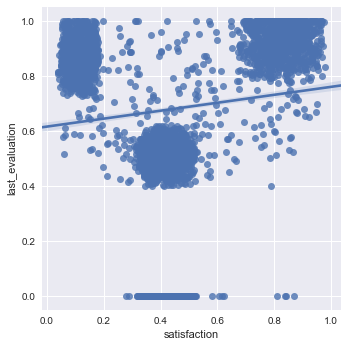

In [26]:
#as seen in data exploration, create 3 indicator variables for different kind of employees who left
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status=='Left'])

In [27]:
#This gives us 3 categories for employees who left
#"Underperformers: for last_evaluation < 0.6 (given that the evaluation was done)
#"Unhappy" for satisfaction_level < 0.2
#"Overachievers" last_evaluation > 0.8 and satisfaction > 0.7

In [29]:
df['underperformers'] = ((df.last_evaluation<0.6) & (df.last_evaluation_missing==0)).astype(int)

In [30]:
df['unhappy'] = ((df.satisfaction<0.2)).astype(int)

In [31]:
df['overachievers'] = ((df.last_evaluation>0.8) & (df.satisfaction>0.7)).astype(int)

In [33]:
df[['underperformers', 'unhappy', 'overachievers']].mean()

underperformers    0.285257
unhappy            0.092195
overachievers      0.177069
dtype: float64

In [34]:
#convert status into indicator variable with Left = 1
df['status'] = pd.get_dummies( df.status ).Left

In [35]:
df.shape

(14068, 14)

In [36]:
df.dtypes

avg_monthly_hrs              int64
department                  object
filed_complaint            float64
last_evaluation            float64
n_projects                   int64
recently_promoted          float64
salary                      object
satisfaction               float64
status                       uint8
tenure                     float64
last_evaluation_missing      int64
underperformers              int64
unhappy                      int64
overachievers                int64
dtype: object

In [37]:
df = pd.get_dummies(df, columns=['salary', 'department'])

In [38]:
df.dtypes

avg_monthly_hrs              int64
filed_complaint            float64
last_evaluation            float64
n_projects                   int64
recently_promoted          float64
satisfaction               float64
status                       uint8
tenure                     float64
last_evaluation_missing      int64
underperformers              int64
unhappy                      int64
overachievers                int64
salary_high                  uint8
salary_low                   uint8
salary_medium                uint8
department_IT                uint8
department_Missing           uint8
department_admin             uint8
department_engineering       uint8
department_finance           uint8
department_management        uint8
department_marketing         uint8
department_procurement       uint8
department_product           uint8
department_sales             uint8
department_support           uint8
dtype: object

In [39]:
df.to_csv('analytical_base_table.csv', index=None)